In [108]:
import pandas as pd
import numpy as np
import os

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
### sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

# # scikit-learn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# # Over-sampling using SMOTE
# from imblearn.over_sampling import SMOTE

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn import tree

import xgboost as xgb

import joblib

# Keras
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.layers import Dense, Input, Dropout
# from tensorflow.keras.models import Sequential

In [109]:
#data has been loaded from csv to dataframe

datas = pd.read_csv("C:\\Users\\Ayusha Kashilkar\\Desktop\\final\\Churn_Modelling.csv", encoding ='cp1252')
datas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data cleaning and Preprocessing

In [110]:
datas.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [111]:
datas.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


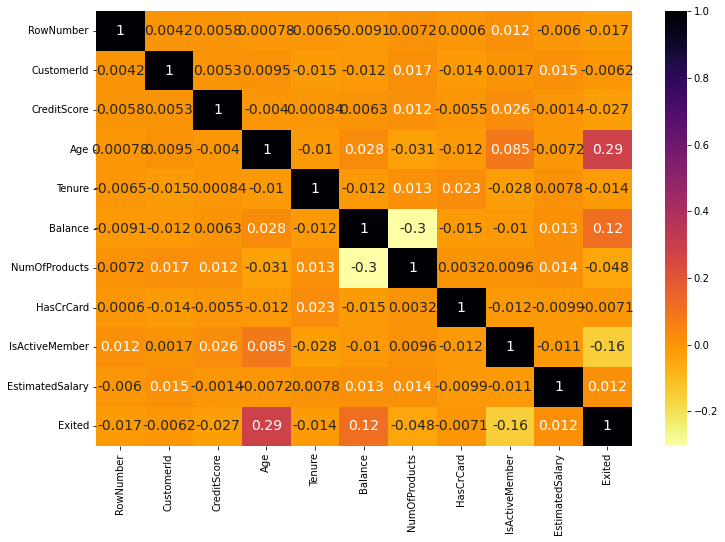

In [112]:
# correlation matrix

fig, ax = plt.subplots( figsize = (12,8) )

corr_matrix = datas.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "inferno_r", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

In [113]:
mutual_info=datas.corr()["Exited"].sort_values(ascending=False)
mutual_info

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [114]:
datas.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [115]:
datas["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [116]:
datas.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

Seperate dataframe into Separate object

<AxesSubplot:xlabel='Gender', ylabel='count'>

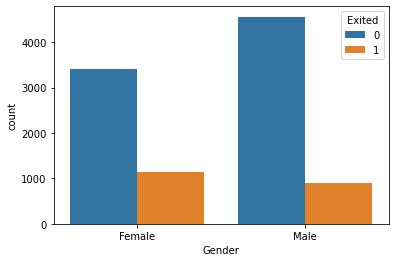

In [117]:
sns.countplot(x="Gender",hue="Exited",data=datas)


In [118]:
# checking categorical variable

categorical_col=[col for col in datas.columns if datas[col].dtype=="object" and datas[col].nunique()<10]
categorical_col

['Geography', 'Gender']

In [119]:
#creating dummy variables

datas=pd.get_dummies(datas,drop_first=True)


In [120]:
datas.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


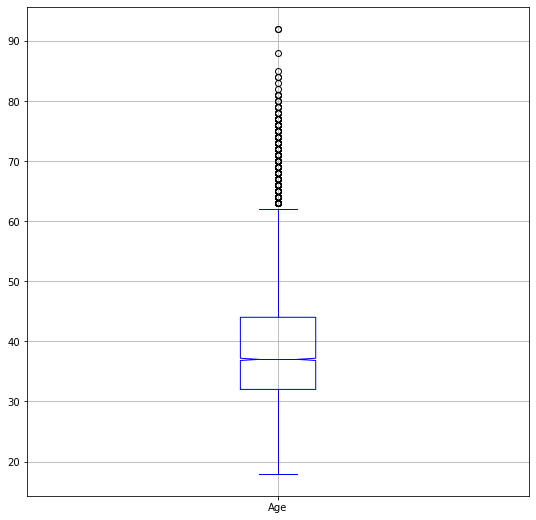

In [121]:
#box plot for checking outliers

plt.figure(figsize=(9,9))
boxplot= datas.boxplot(column = ['Age'], notch=True,color = 'Blue')

In [122]:
#IQR to remove outliers

q25=np.quantile(datas["Age"],0.25)
q75=np.quantile(datas["Age"],0.75)

iqr=q75-q25

lower=q25-1.5*iqr
upper=q75+1.5*iqr

print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)

The IQR is 12.0
The lower bound value is 14.0
The upper bound value is 62.0


In [123]:
datas=datas[(datas["Age"]<upper)&(datas["Age"]>lower)]

In [124]:
X=datas.drop("Exited",axis=1)
y=datas["Exited"]

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
# spliting dat ainto train n test

random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state,
                                                   stratify=datas.Exited)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

random_state = 10

#split X and y into train and test sets

X_train, Xtest, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                  random_state = random_state,
                                                  stratify=datas.Exited)

print(len(X_train), len(X_test), len(y_train), len(y_test))

6712 2877 6712 2877
6712 2877 6712 2877


In [127]:
scale=StandardScaler()
train=scale.fit_transform(X_train)
test=scale.transform(X_test)

In [128]:
X_train=pd.DataFrame(train,columns=X_train.columns)
X_test=pd.DataFrame(test,columns=X_test.columns)

# Using SMOTE for oversampling

In [129]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
X_train,y_train=oversampling.fit_resample(X_train,y_train)

y_train.value_counts()

1    5352
0    5352
Name: Exited, dtype: int64

C:\Users\Ayusha Kashilkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

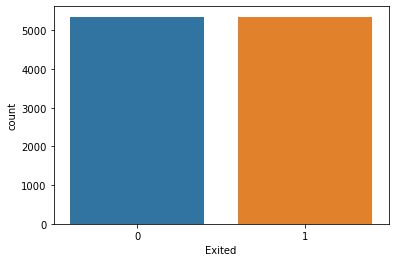

In [130]:
sns.countplot(y_train)

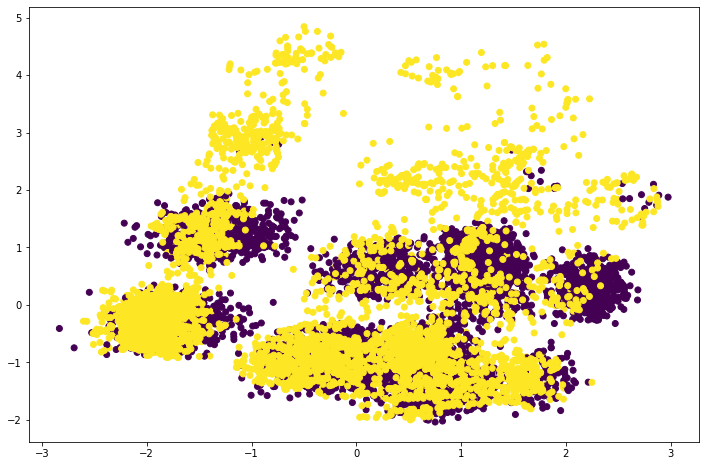

In [131]:
plt.figure(figsize=(12,8))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X_train)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_train)

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

# Linear Regression

In [143]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(confusion_matrix(y_test,pred))
print("\n\n")
print(classification_report(y_test,pred))

[[1706  588]
 [ 182  401]]



              precision    recall  f1-score   support

           0       0.90      0.74      0.82      2294
           1       0.41      0.69      0.51       583

    accuracy                           0.73      2877
   macro avg       0.65      0.72      0.66      2877
weighted avg       0.80      0.73      0.75      2877



In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[1706  588]
 [ 182  401]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      2294
           1       0.41      0.69      0.51       583

    accuracy                           0.73      2877
   macro avg       0.65      0.72      0.66      2877
weighted avg       0.80      0.73      0.75      2877

0.732360097323601


# Random Forest before hyperparameter tunning

In [144]:
from sklearn.ensemble import RandomForestClassifier

para = RandomForestClassifier()
para.fit(X_train,y_train)
para1 = model.predict(X_test)

print(confusion_matrix(y_test,para1))
print("\n\n")
print(classification_report(y_test,para1))
print(accuracy_score(y_test, para1))

[[1706  588]
 [ 182  401]]



              precision    recall  f1-score   support

           0       0.90      0.74      0.82      2294
           1       0.41      0.69      0.51       583

    accuracy                           0.73      2877
   macro avg       0.65      0.72      0.66      2877
weighted avg       0.80      0.73      0.75      2877

0.732360097323601


# Random Forest with hyperparameter tunning

In [145]:
from sklearn.ensemble import RandomForestClassifier

params={"n_estimators":[100,150,200,250,300,350],
         "max_depth":[6,9,12,15,18,21],
       }

model=RandomForestClassifier(min_samples_leaf=10,n_jobs=-1)

In [146]:
grid=GridSearchCV(model,params,cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(min_samples_leaf=10, n_jobs=-1),
             param_grid={'max_depth': [6, 9, 12, 15, 18, 21],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='neg_mean_squared_error')

In [147]:
grid.best_params_

{'max_depth': 15, 'n_estimators': 250}

In [148]:
model=grid.best_estimator_
pred=model.predict(X_test)

In [149]:
print(confusion_matrix(y_test,pred))
print("\n\n")
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[1971  323]
 [ 200  383]]



              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2294
           1       0.54      0.66      0.59       583

    accuracy                           0.82      2877
   macro avg       0.73      0.76      0.74      2877
weighted avg       0.83      0.82      0.82      2877

0.8182134167535627


In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[1971  323]
 [ 200  383]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2294
           1       0.54      0.66      0.59       583

    accuracy                           0.82      2877
   macro avg       0.73      0.76      0.74      2877
weighted avg       0.83      0.82      0.82      2877

0.8182134167535627
